# 머신러닝
    예측 / 분류 / 군집
    지도학습(정답) / 비지도학습(정답이 없음)
    회귀분석 - 예측 군집
    분류

### 머신러닝 프로세스
    데이터 정리(잔처리) - 데이터 분리(훈련용 / 검증) - 알고리즘 준비(머신러닝 선택) - 학습(훈련데이터) - 예측(검증 데이터) - 평가 - 모델 활용

In [2]:
# 단순회귀: 두 변수 사이의 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘
# 1. 데이터 정리(전처리)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/auto-mpg.csv'
colnames = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
df = pd.read_csv(url, header=None, names=colnames)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [9]:
df2 = df[['mpg', 'cylinders', 'horsepower', 'weight']]
df2.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


### 선형관계 확인 - 종속변수와 독립변수간의 일대일 관계 - 직선의 그래프 형태

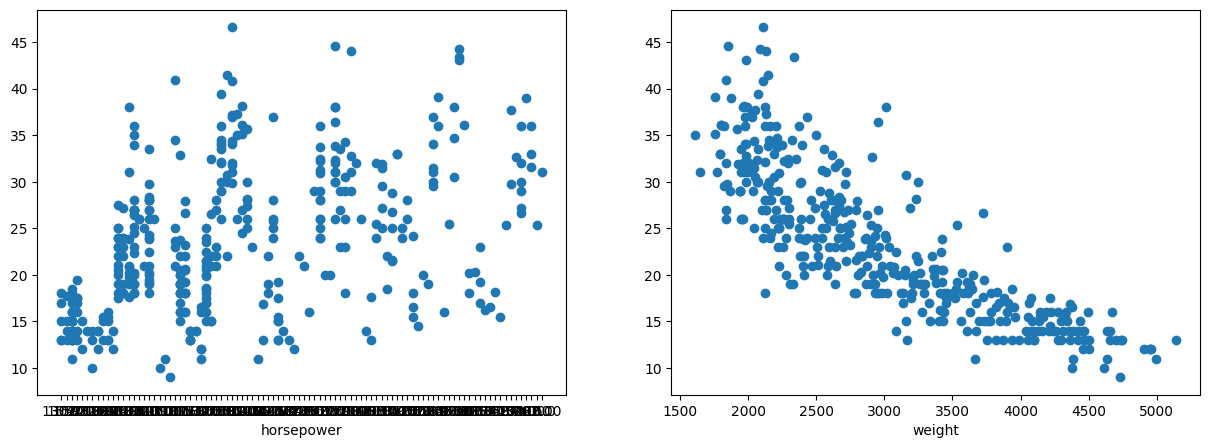

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(data=df2, x='horsepower', y='mpg')
plt.xlabel('horsepower')

plt.subplot(1,2,2)
plt.scatter(data=df2, x='weight', y='mpg')
plt.xlabel('weight')
plt.show()

### seaborn regplot 회귀선을 포함한 plot

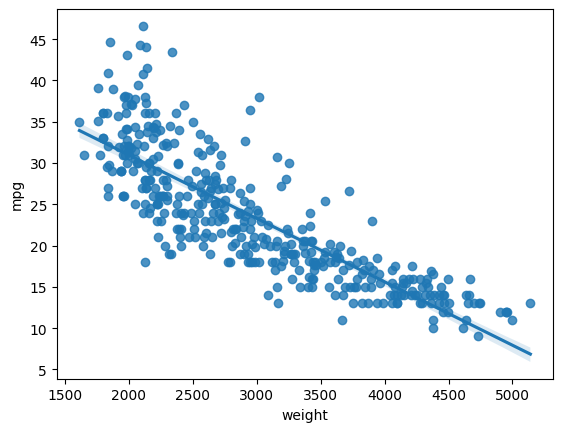

In [15]:
sns.regplot(x='weight', y='mpg', data=df2)
plt.show()

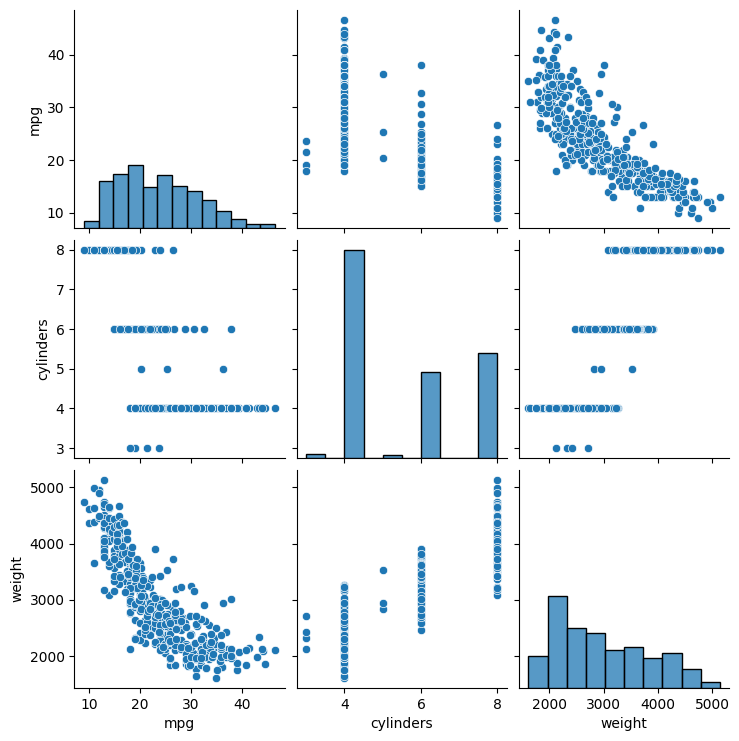

In [16]:
sns.pairplot(df2)
plt.show()

# 2. 데이터 분리(훈련용 / 검증용)

In [29]:
# 종속변수는 mpg 독립변수는 weight, horsepower 상관관계가 있음을 확인
# weight를 선택해서 학습
from sklearn.model_selection import train_test_split
x = df[['weight']]
y = df['mpg']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [21]:
len(df2), len(x_train), len(x_test)

(398, 298, 100)

# 3. 알고리즘 준비(머신러닝 선택) - 단순선형(단항회귀분석)

In [23]:
# 회귀 regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 4. 학습 - fit

In [32]:
print(x_train.shape)
lr.fit(x_train, y_train)

(298, 1)


LinearRegression()

In [33]:
print('기울기:', lr.coef_)
print('절편:', lr.intercept_)

기울기: [-0.00761665]
절편: 46.09128354684965


# 5. 예측

In [36]:
x_test.values[0], lr.predict(x_test)[0], y_test.values[0]

(array([4129.]), 14.642120973145918, 14.0)

# 6. 평가 - 결정계수(R-제곱)

In [35]:
lr.score(x_test, y_test)

0.717876335343846

### 모델의 성능 시각화 - 모델을 학습한 후 검증용으로 예측한 값과 실제값이 어느정도 차이를 보이는지

In [39]:
y_hat = lr.predict(x)

C:\Temp\ipykernel_44636\3931698126.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y,hist=False,label='y')
C:\Temp\ipykernel_44636\3931698126.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat, hist=False, label='y_hat')


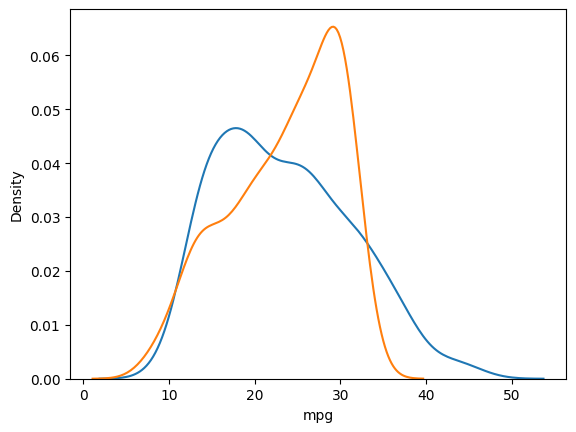

In [42]:
sns.distplot(y,hist=False,label='y')
sns.distplot(y_hat, hist=False, label='y_hat')
plt.show()

# 다항 회귀분석 - 2차원 이상

In [44]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [45]:
df.horsepower.replace('?', np.nan, inplace=True)

In [46]:
df.horsepower = df.horsepower.astype(np.float32)

In [47]:
df.dropna(subset=['horsepower'], inplace=True)

In [48]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469391,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491158,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [52]:
x = df[['horsepower']]
y = df[['mpg']]

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=0)

In [54]:
print('훈련 데이터:', x_train.shape)
print('검증 데이터:', x_test.shape)

훈련 데이터: (294, 1)
검증 데이터: (98, 1)


In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
poly = PolynomialFeatures(degree=2) #2차원 다항식으로 변환

In [63]:
x_train_poly = poly.fit_transform(x_train)

In [64]:
poly.fit_transform(x_train)[0], x_train.values[0]

(array([1.000e+00, 5.200e+01, 2.704e+03], dtype=float32),
 array([52.], dtype=float32))

In [59]:
x_train.shape

(294, 1)

In [65]:
x_train_poly.shape

(294, 3)

In [66]:
plr = LinearRegression()
plr.fit(x_train_poly, y_train)

LinearRegression()

In [67]:
# 결정계수
plr.score(poly.fit_transform(x_test), y_test)

0.7271034105692382

### 다항식으로 변경한 선형회귀의 모델의 성능 시각화

In [68]:
y_hat = plr.predict(poly.fit_transform(x_test))

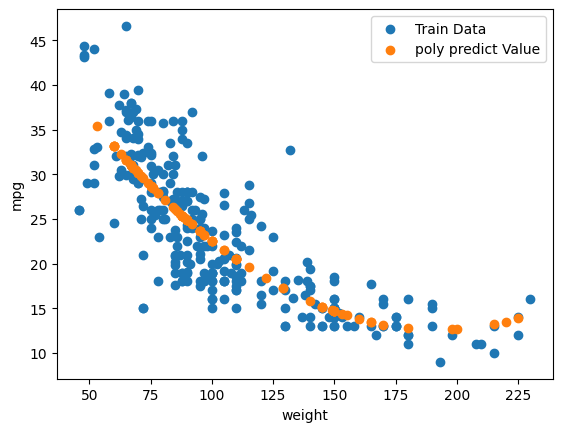

In [71]:
plt.scatter(x_train, y_train, label='Train Data')
plt.scatter(x_test, y_hat, label='poly predict Value')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.legend()
plt.show()

In [74]:
x.shape

(392, 1)

In [72]:
x_poly = poly.fit_transform(x)
y_hat = plr.predict(x_poly)

C:\Temp\ipykernel_44636\2125300548.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, hist=False, label='y')
C:\Temp\ipykernel_44636\2125300548.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat, hist=False, label='y_hat')


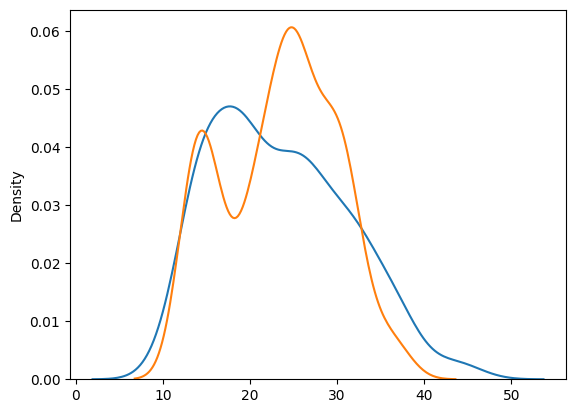

In [73]:
sns.distplot(y, hist=False, label='y')
sns.distplot(y_hat, hist=False, label='y_hat')
plt.show()

# 다중 회귀 분석

### 독립변수가 여러개가 종속변수에 영향을 주고 선형관계를 갖는 경우

In [75]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [76]:
x = df[['cylinders', 'horsepower', 'weight']]
y = df['mpg']

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [78]:
x_train.shape, y_train.shape

((294, 3), (294,))

In [79]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# 평가: 결정계수

In [80]:
lr.score(x_test, y_test)

0.677877584199057